##### Measures of Central Tendency Mean Median Mode and Finding Outliers 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_CSV = pd.read_csv('./Data/Data1.csv')

In [3]:
data_CSV.head(4)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [4]:
data_CSV['monthly_charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

In [5]:
data_CSV['total_charges'].describe()

count     7043
unique    6531
top           
freq        11
Name: total_charges, dtype: object

In [6]:
data_CSV['multiple_lines'].value_counts(dropna=False)

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [7]:
data_CSV['internet_service'].value_counts(dropna=False)

Fiber optic    3096
DSL            2421
No             1526
Name: internet_service, dtype: int64

In [8]:
data_CSV['monthly_charges'].value_counts(dropna=False)

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthly_charges, Length: 1585, dtype: int64

In [9]:
pd.DataFrame(data_CSV['monthly_charges'].describe())

,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [10]:
data_CSV[['monthly_charges']].median()

monthly_charges    70.35
dtype: float64

In [11]:
pd.DataFrame(data_CSV['total_charges'].describe())

,total_charges
count,7043
unique,6531
top,
freq,11


In [12]:
pd.DataFrame(data_CSV['total_charges'].value_counts(dropna=False))

,total_charges
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1
3211.9,1


In [13]:
data_CSV['total_charges'].isnull().sum()

0

In [14]:
data_CSV['monthly_charges'].isnull().sum()

0

#### Prolem Statement 
##### What internet_service do people spend the most money on and what check average monthly cost which is suitable for each internet service
##### Monthly cost has an outlliar which shold br taken care of

##### Monthly Charges Analysis

In [15]:
data_CSV.shape

(7043, 21)

In [16]:
pd.DataFrame(data_CSV['monthly_charges'].describe())

,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [17]:
data_CSV['monthly_charges'].mean()

64.76169246059918

In [18]:
data_mothlyCharges = data_CSV['monthly_charges']

In [19]:
data_mothlyCharges.shape

(7043,)

In [20]:
data_25 = pd.DataFrame(data_mothlyCharges[data_mothlyCharges < 35.5])

In [21]:
data_25

,monthly_charges
0,29.85
7,29.75
11,18.95
16,20.65
21,19.80
...,...
7019,20.15
7020,19.20
7030,20.05
7037,21.15


In [22]:
7043 * 0.25

1760.75

In [23]:
pd.DataFrame(data_mothlyCharges[data_mothlyCharges > 89.850000])

,monthly_charges
5,99.65
8,104.80
12,100.35
13,103.70
14,105.50
...,...
7023,103.50
7025,95.05
7034,102.95
7039,103.20


##### Top 75 percentile 

In [24]:
data_75 = pd.DataFrame(data_mothlyCharges[data_mothlyCharges > 89.850000])

In [25]:
1758 /7043     ### top 25%

0.2496095413886128

Text(0, 0.5, 'Frequency')

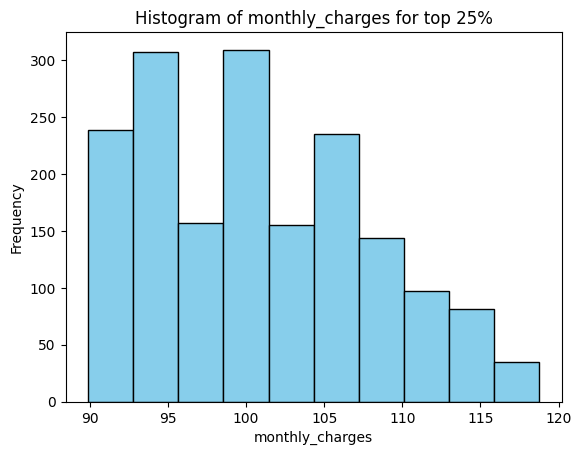

In [26]:
plt.hist(data_75['monthly_charges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of monthly_charges for top 25%')
plt.xlabel('monthly_charges')
plt.ylabel('Frequency')

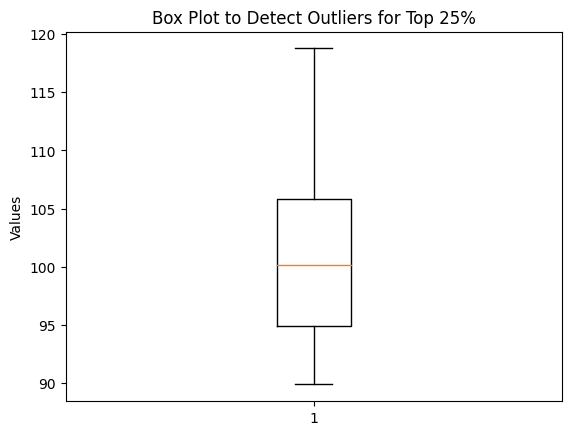

In [27]:
plt.boxplot(data_75['monthly_charges'])
plt.title('Box Plot to Detect Outliers for Top 25%')
plt.ylabel('Values')

# Show plot
plt.show()

##### Lower 25 percentile 

In [28]:
##### Top 75 percentile 

Text(0, 0.5, 'Frequency')

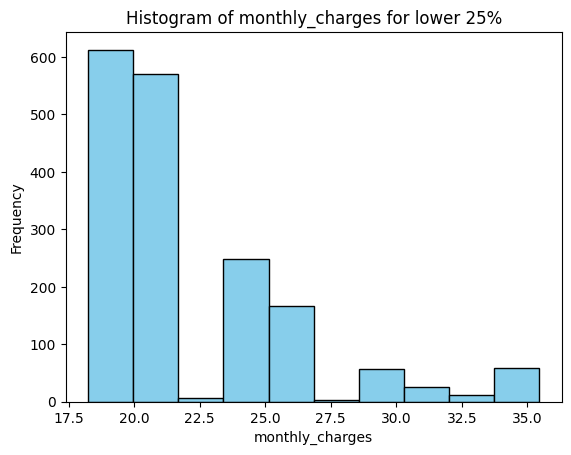

In [29]:
plt.hist(data_25['monthly_charges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of monthly_charges for lower 25%')
plt.xlabel('monthly_charges')
plt.ylabel('Frequency')

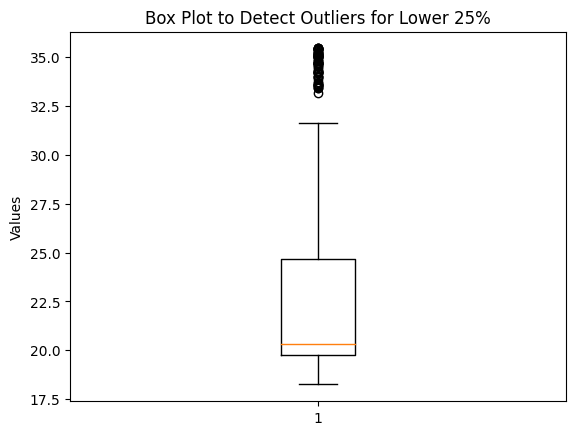

In [30]:
plt.boxplot(data_25['monthly_charges'])
plt.title('Box Plot to Detect Outliers for Lower 25%')
plt.ylabel('Values')

# Show plot
plt.show()

##### Betweem 25 and 75 percentile 

In [31]:
data_mothlyChargesDF= pd.DataFrame(data_mothlyCharges)

In [32]:
data_25_75 = data_mothlyChargesDF[(data_mothlyChargesDF['monthly_charges'] >= 35.5) & (data_mothlyChargesDF['monthly_charges'] <= 89.850000)]

In [33]:
data_25_75

,monthly_charges
1,56.95
2,53.85
3,42.30
4,70.70
6,89.10
...,...
7033,69.50
7035,78.70
7036,60.65
7038,84.80


Text(0, 0.5, 'Frequency')

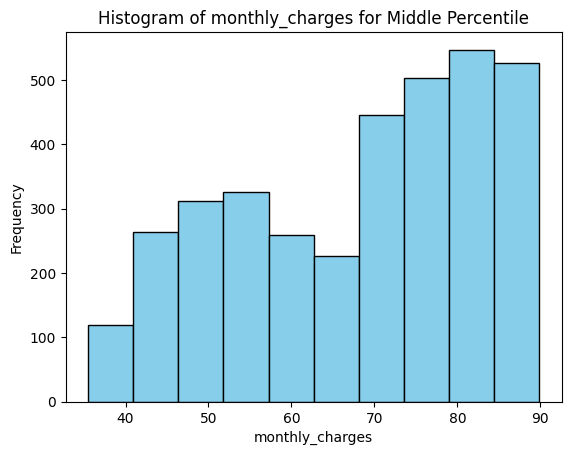

In [34]:
plt.hist(data_25_75['monthly_charges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of monthly_charges for Middle Percentile')
plt.xlabel('monthly_charges')
plt.ylabel('Frequency')

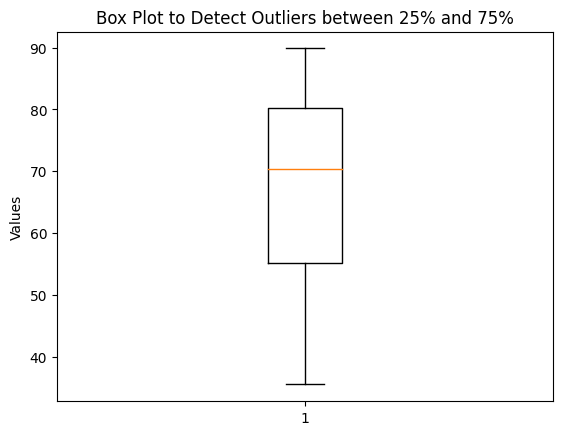

In [35]:
plt.boxplot(data_25_75['monthly_charges'])
plt.title('Box Plot to Detect Outliers between 25% and 75%')
plt.ylabel('Values')

# Show plot
plt.show()

##### All Values percentile 

In [36]:
data_mothlyChargesDF2 = pd.DataFrame(data_mothlyCharges)

Text(0, 0.5, 'Frequency')

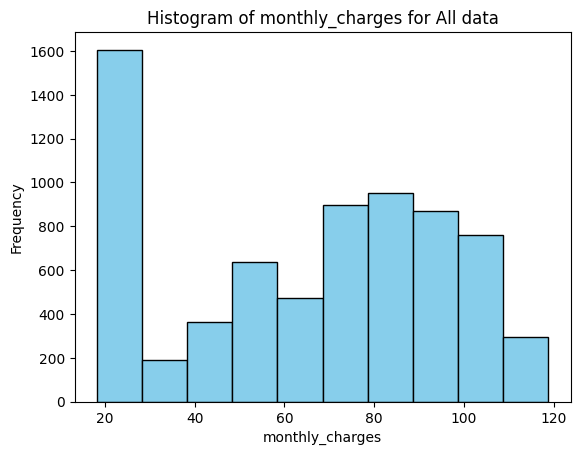

In [37]:
plt.hist(data_mothlyChargesDF2['monthly_charges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of monthly_charges for All data')
plt.xlabel('monthly_charges')
plt.ylabel('Frequency')

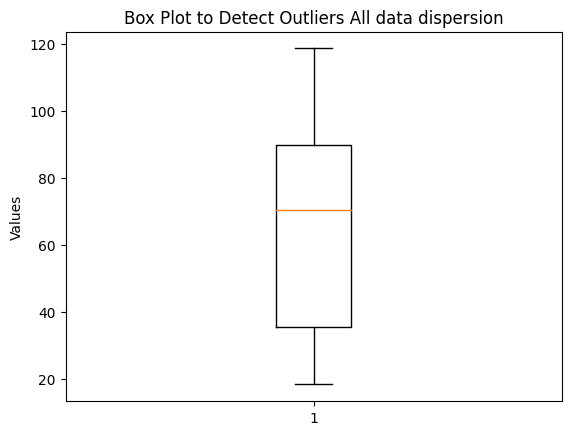

In [38]:
plt.boxplot(data_mothlyChargesDF2['monthly_charges'])
plt.title('Box Plot to Detect Outliers All data dispersion')
plt.ylabel('Values')

# Show plot
plt.show()

#### Finding the Outliars with IQR

In [39]:
data_mothlyChargesDF2.describe()

,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [40]:
IQR = 89.850000 - 35.500000
IQR

54.349999999999994

##### Lower-Limit = Q1 -1.5*IQR  IQR = Q3 - Q1 
##### IQR = (90-35) = 55
##### Lower Limit = 35 - 1.5 * 55

In [41]:
Q1= data_mothlyChargesDF2.quantile([0.75])
Q1

,monthly_charges
0.75,89.85


In [42]:
data_mothlyChargesDF2.describe()

,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [43]:
IQR = 89.850000 - 35.500000
IQR

54.349999999999994

##### Lower Interval

In [44]:
lower = 35.500000 - (1.5* 54.349999999999994)
lower

-46.02499999999999

##### Higher Interval

In [45]:
Upper = 89.850000 + (1.5 * 54.349999999999994)
Upper

171.375

In [46]:
data_mothlyChargesDF2[data_mothlyChargesDF2['monthly_charges']  > Upper]

,monthly_charges


In [47]:
data_mothlyChargesDF2[data_mothlyChargesDF2.monthly_charges <lower]

,monthly_charges


##### Conclusion
##### Data does not have any outliars based on IQR Calc.

##### Understanding Box Plot Pending

In [49]:
data_mothlyChargesDF2.describe()

,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [48]:
data_25_75

,monthly_charges
1,56.95
2,53.85
3,42.30
4,70.70
6,89.10
...,...
7033,69.50
7035,78.70
7036,60.65
7038,84.80
